# Les nombres dans sympy

In [1]:
%matplotlib widget
from sympy import *
init_printing(use_latex=True)

In [2]:
a = 2
b = 1/3
c = S(1) / 3


x, y, z = symbols("x, y, z")

expr1 = (x + 1)**2
res = expr1.subs(x, c)


type(a), type(b), type(c)

(int, float, sympy.core.numbers.Rational)

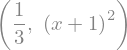

In [3]:
c,expr1

In [4]:
res

In [1]:
from manim import *



Manim Community v0.15.1

In [2]:
%%manim -qm -v WARNING Mon


class Mon(Scene):
    def construct(self):
        text=MathTex("\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+","g(x)\\frac{d}{dx}f(x)")
        self.play(Write(text))
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(Create(framebox1),)
        self.wait()
        self.play(ReplacementTransform(framebox1,framebox2),)
        self.wait()

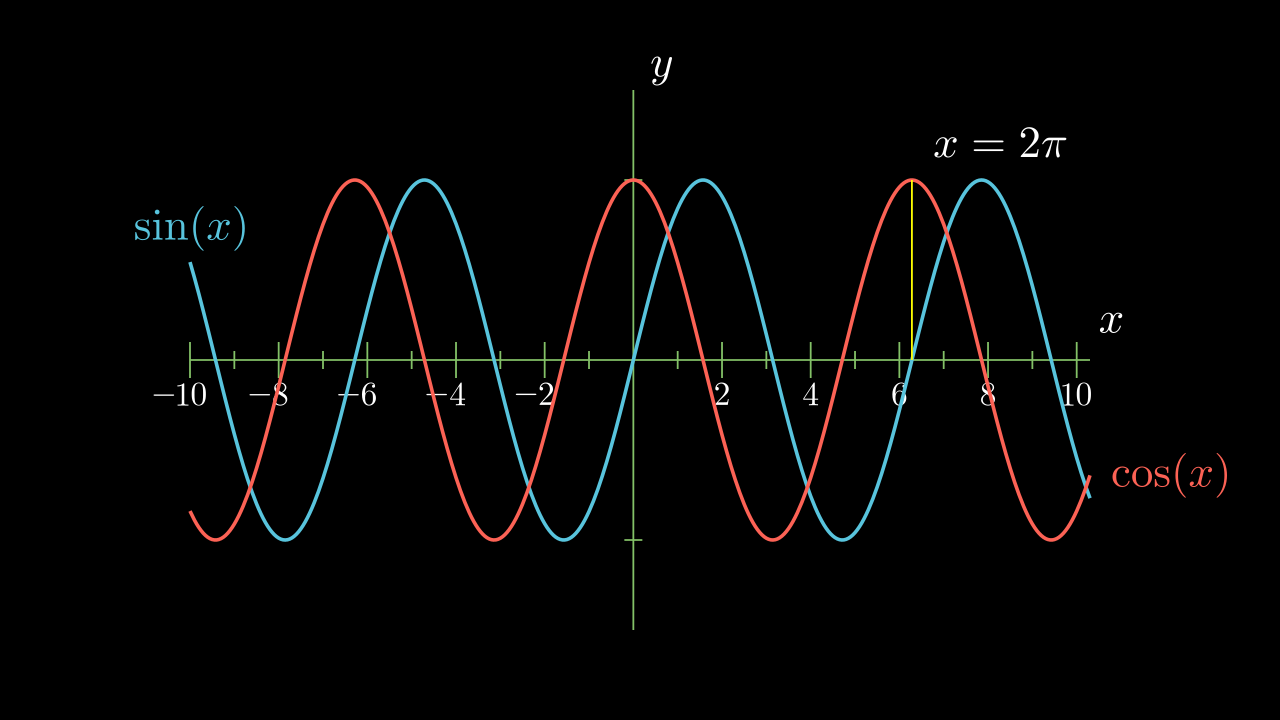

In [3]:
%%manim -qm -v WARNING Mon
class Mon(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-10, 10.3, 1],
            y_range=[-1.5, 1.5, 1],
            x_length=10,
            axis_config={"color": GREEN},
            x_axis_config={
                "numbers_to_include": np.arange(-10, 10.01, 2),
                "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2),
            },
            tips=False,
        )
        axes_labels = axes.get_axis_labels()
        sin_graph = axes.plot(lambda x: np.sin(x), color=BLUE)
        cos_graph = axes.plot(lambda x: np.cos(x), color=RED)

        sin_label = axes.get_graph_label(
            sin_graph, "\\sin(x)", x_val=-10, direction=UP / 2
        )
        cos_label = axes.get_graph_label(cos_graph, label="\\cos(x)")

        vert_line = axes.get_vertical_line(
            axes.i2gp(TAU, cos_graph), color=YELLOW, line_func=Line
        )
        line_label = axes.get_graph_label(
            cos_graph, "x=2\pi", x_val=TAU, direction=UR, color=WHITE
        )

        plot = VGroup(axes, sin_graph, cos_graph, vert_line)
        labels = VGroup(axes_labels, sin_label, cos_label, line_label)
        self.add(plot, labels)

In [29]:
%%manim -qh -v WARNING Mon
class Mon(Scene):
    def construct(self):
        def func(x):
            return 2 * (x - 5) ** 2
        
        
        ax = Axes(x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False})
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")
        t = ValueTracker(0)
        d = ValueTracker(2)

        graph = ax.plot(func, color=MAROON)
        initial_point = [ax.coords_to_point(d.get_value(), func(d.get_value()))]
        dot = Dot(point=initial_point)
        dot.add_updater(lambda x: x.move_to(ax.c2p(d.get_value(), func(d.get_value()))))
        x_space = np.linspace(*ax.x_range[:2],200)
        minimum_index = func(x_space).argmin()
        slopea = always_redraw(lambda: ax.get_secant_slope_group(x=d.get_value(),graph=graph,dx=1.0,dx_label=Tex("dx = 1.0"),dy_label="dy",secant_line_length=7))
        t_label = ax.get_T_label(x_val=2, graph=graph, label=Tex("x-value"))

        self.add(ax, labels, graph, dot,slopea,t_label)
        self.play(t.animate.set_value(x_space[minimum_index]),d.animate.set_value(6))
        self.wait()

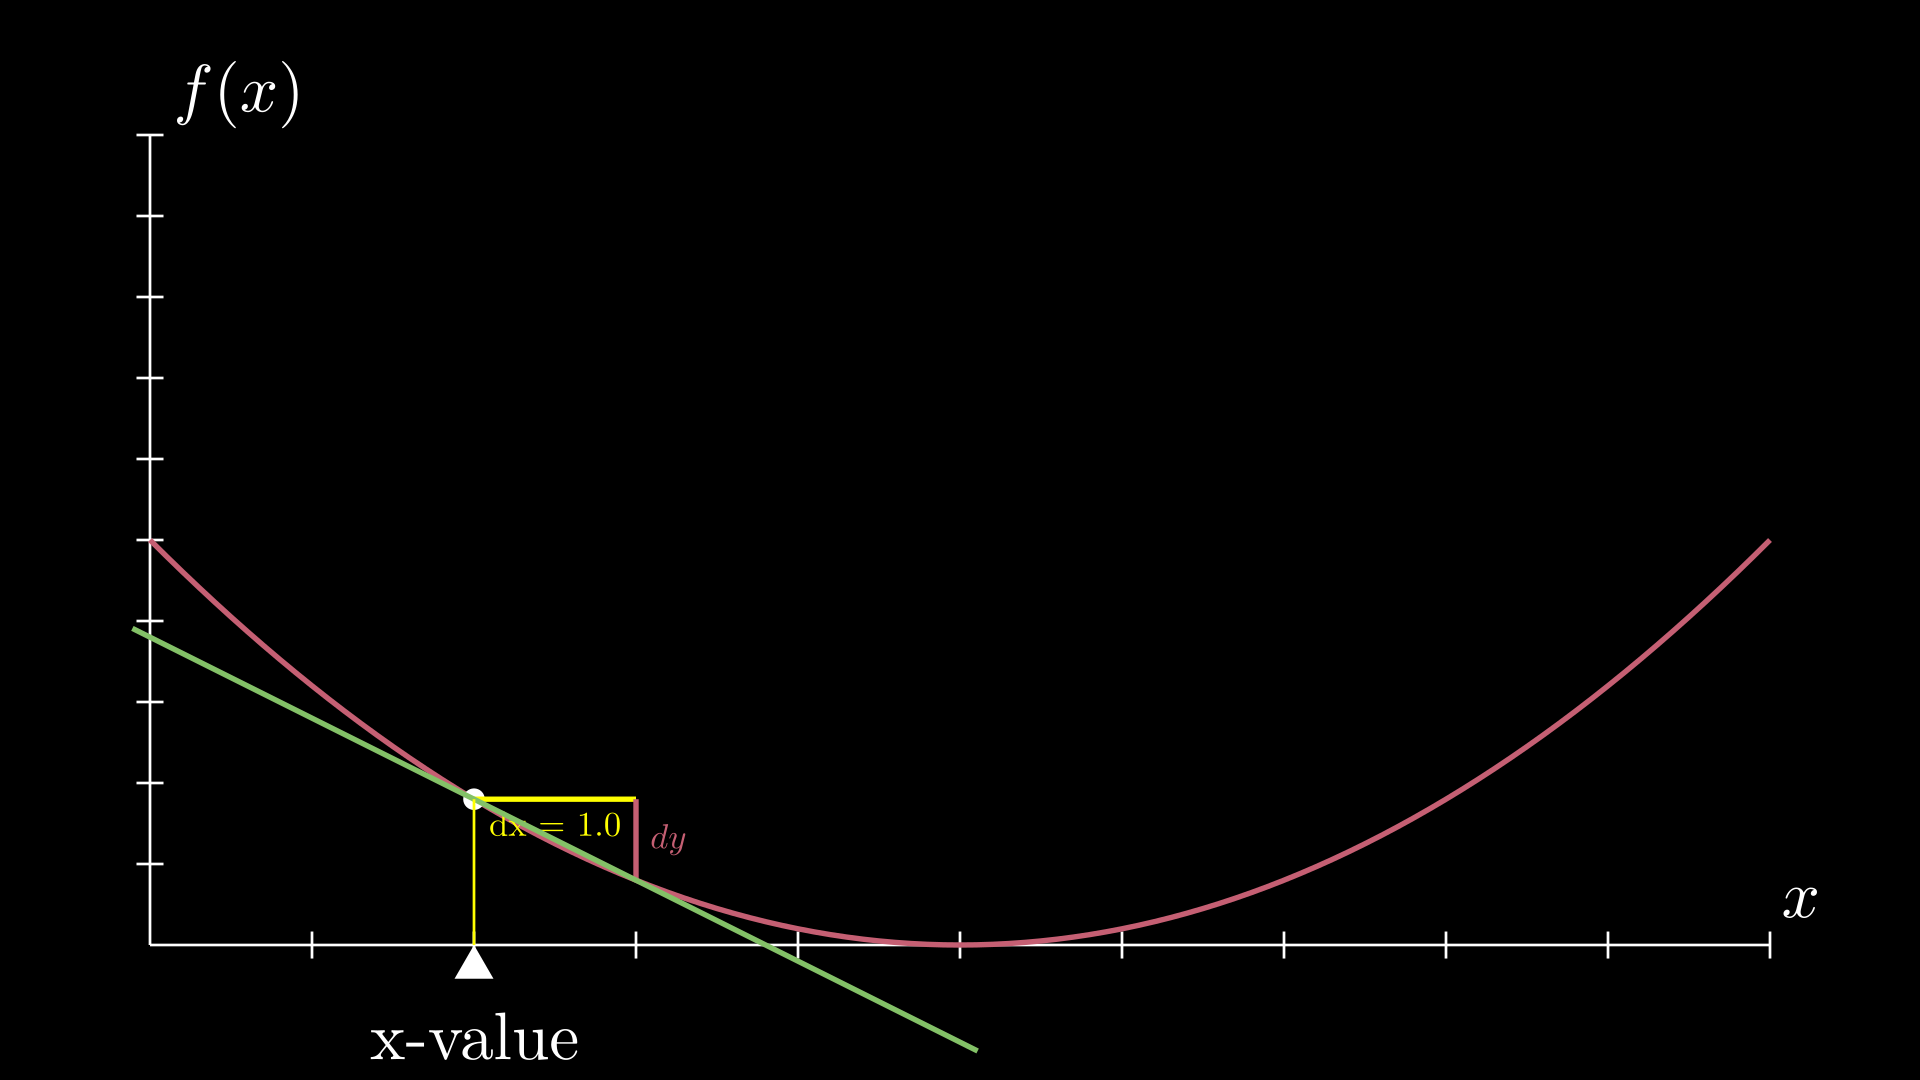

In [30]:
%%manim -qh -v WARNING Mon
class Mon(Scene):
    def construct(self):
        def func(x):
            return 2 * (x - 5) ** 2
        
        
        ax = Axes(x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False})
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")
        t = ValueTracker(0)
        d = ValueTracker(2)

        graph = ax.plot(func, color=MAROON)
        initial_point = [ax.coords_to_point(d.get_value(), func(d.get_value()))]
        dot = Dot(point=initial_point)
        dot.add_updater(lambda x: x.move_to(ax.c2p(d.get_value(), func(d.get_value()))))
        x_space = np.linspace(*ax.x_range[:2],200)
        minimum_index = func(x_space).argmin()
        slopea = always_redraw(lambda: ax.get_secant_slope_group(x=d.get_value(),graph=graph,dx=1.0,dx_label=Tex("dx = 1.0"),dy_label="dy",secant_line_length=7))
        t_label = ax.get_T_label(x_val=2, graph=graph, label=Tex("x-value"))

        self.add(ax, labels, graph, dot,slopea,t_label)

In [36]:
%%manim -qh -v WARNING ED


def get_epsilon_lines(x, dx, graph, axes, line_length=20, color=WHITE):
    result = VGroup()
    line1 = (
        DashedLine(start=ORIGIN, end=line_length * RIGHT)
        .move_to(axes.c2p(x + dx, graph.underlying_function(x + dx)))
        .set_color(color)
    )
    dot1 = (
        Circle(radius=0.07)
        .set_color(color)
        .move_to(axes.c2p(x + dx, graph.underlying_function(x + dx)))
    )

    line2 = (
        DashedLine(start=ORIGIN, end=line_length * RIGHT)
        .move_to(axes.c2p(x - dx, graph.underlying_function(x - dx)))
        .set_color(color)
    )
    dot2 = (
        Circle(radius=0.07)
        .set_color(color)
        .move_to(axes.c2p(x - dx, graph.underlying_function(x - dx)))
    )
    result.add(line1, line2, dot1, dot2)
    return result


def get_delta_lines(x, dx, axes, line_length=20, color=WHITE):
    result = VGroup()
    line1 = (
        DashedLine(start=ORIGIN, end=line_length * UP)
        .move_to(axes.c2p(x + dx, 0))
        .set_color(color)
    )
    line2 = (
        DashedLine(start=ORIGIN, end=line_length * UP)
        .move_to(axes.c2p(x - dx, 0))
        .set_color(color)
    )
    result.add(line1, line2)
    return result


def get_faded_undefined_epsilon_delta_lines(
    x, graph, axes, line_length=20, color=WHITE, opacity=0.5
):
    result = VGroup()
    epsilon_line = (
        DashedLine(start=ORIGIN, end=line_length * RIGHT)
        .set_color(color)
        .move_to(
            axes.c2p(x + 0.0000001, graph.underlying_function(x + 0.0000001))
        )  # NEED to add the +0.000001 as undefined point otherwise
        .set_opacity(opacity)
    )
    delta_line = (
        DashedLine(start=ORIGIN, end=line_length * UP)
        .set_color(color)
        .move_to(axes.c2p(x, 0))
        .set_opacity(opacity)
    )
    result.add(epsilon_line, delta_line)
    return result


def get_output_limit_range(x, graph, dx, range, axes):
    result = VGroup()
    dot = (
        Circle(radius=0.07)
        .set_color(YELLOW)
        .move_to(
            axes.c2p(x + 0.000001, graph.underlying_function(x + 0.000001))
        )  # Need to +0.00001 as point is undefined otherwise
    )
    result.add(dot)
    for x in np.arange(x - range, x + range, dx):
        if 0 - dx < x < 0 + dx:
            line = VectorizedPoint
        else:
            line = Line(
                start=axes.c2p(x, graph.underlying_function(x)),
                end=axes.c2p((x + dx), graph.underlying_function(x + dx)),
            ).set_color(YELLOW)
            result.add(line)
    return result


class ED(Scene):
    def construct(self):

        axes = Axes(
            x_range=[-8, 6, 2],
            x_length=10,
            y_range=[0, 21, 5],
            y_length=6,
            axis_config={"include_numbers": True, "include_tip": False},
        ).set_color(GREY)
        axes_labels = axes.get_axis_labels(x_label="x", y_label="f(x)")

        graph = axes.plot(lambda x: (((2 + x) ** 3 - 8)) / x)

        graph_label = (
            MathTex("f(x)=\\frac{(2+x)^3 - 8}{x}")
            .set_color(BLUE)
            .next_to(graph, RIGHT, buff=0.5)
        )

        dx = ValueTracker(1)

        epsilon_lines = always_redraw(
            lambda: get_epsilon_lines(x=0, dx=dx.get_value(), graph=graph, axes=axes)
        )

        delta_lines = always_redraw(
            lambda: get_delta_lines(x=0, dx=dx.get_value(), axes=axes)
        )

        faded_undefined = get_faded_undefined_epsilon_delta_lines(
            x=0, graph=graph, axes=axes
        )

        input_range = VGroup()
        input_line = Line(start=axes.c2p(-1, 0), end=axes.c2p(1, 0)).set_color(YELLOW)
        input_circle = Circle(radius=0.05).move_to(axes.c2p(0, 0)).set_color(YELLOW)
        input_range.add(input_circle, input_line)

        output_range = get_output_limit_range(
            x=0, graph=graph, dx=0.02, range=0.5, axes=axes
        )

        self.add(
            axes,
            axes_labels,
            graph,
            graph_label,
            epsilon_lines,
            delta_lines,
            faded_undefined,
        )
        self.wait()
        self.play(dx.animate.set_value(0.01), run_time=6, rate_func=there_and_back)
        self.play(Create(input_range))
        self.play(ReplacementTransform(input_range, output_range), run_time=2)
        self.wait()
        self.play(dx.animate.set_value(0.01), run_time=6, rate_func=there_and_back)
